In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment


In [2]:
data = pd.read_excel('/content/iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Filling the missing values

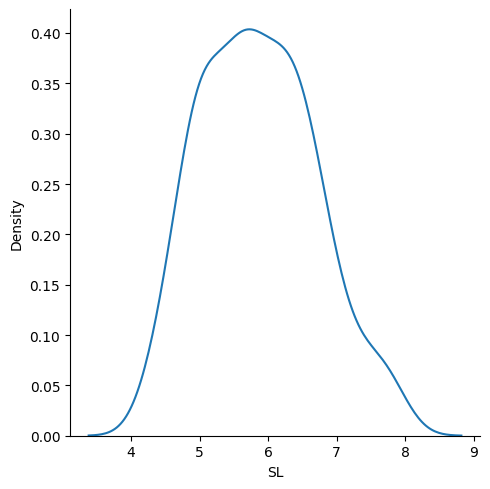

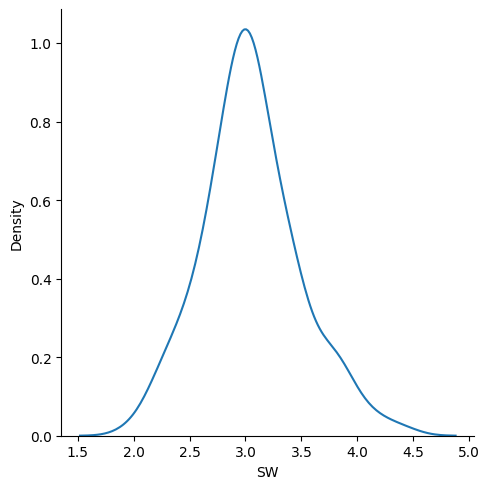

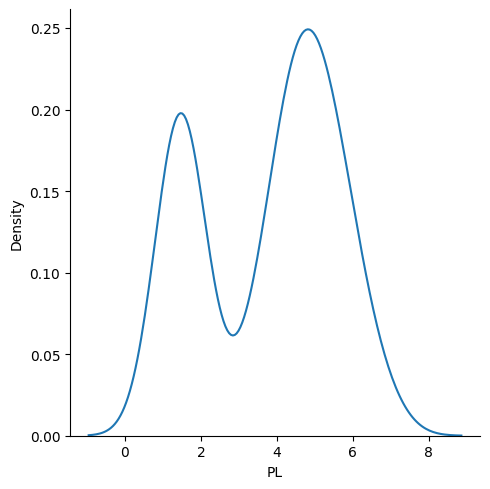

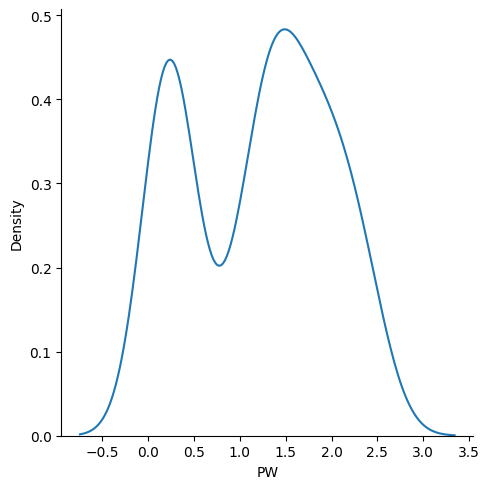

In [ ]:
col = ['SL','SW','PL','PW']
for i in col:
  sns.displot(data = data,x=i, kind='kde')

In [8]:
data['SL'] = data['SL'].fillna(data['SL'].mean())

In [9]:
data['SW'] = data['SW'].fillna(data['SW'].mean())

In [10]:
data['PL'] = data['PL'].fillna(data['PL'].mean())

In [11]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Check for Outliers

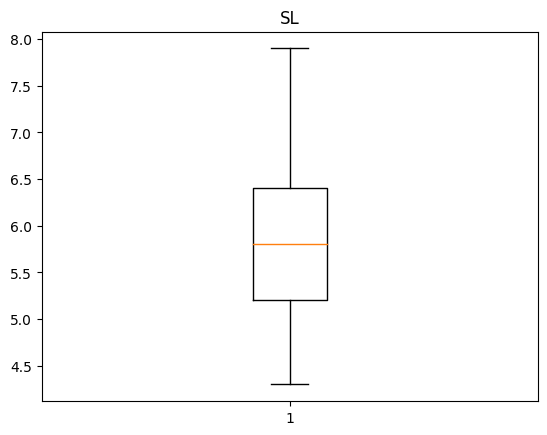

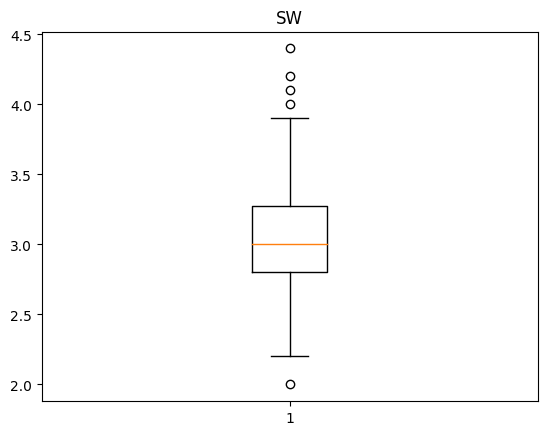

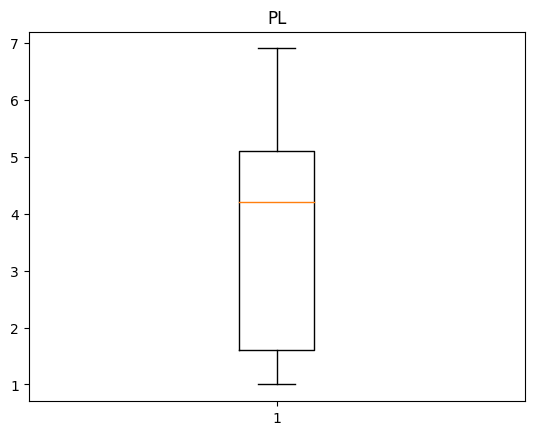

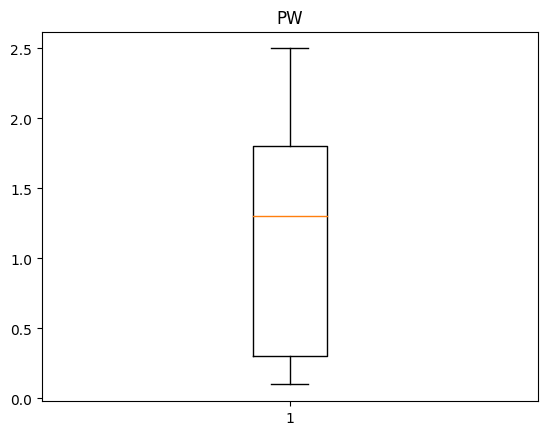

In [12]:
num_cols = ['SL','SW','PL','PW']
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)


## Removing Outliers

In [13]:
q1 = np.percentile(data['SW'],25,method='midpoint')

In [14]:
q2 = np.percentile(data['SW'],50,method='midpoint')
q3 = np.percentile(data['SW'],75,method='midpoint')

In [15]:
iqr = q3 - q1

In [16]:
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5 *iqr

In [17]:
outlier = []
for i in data['SW']:
  if i < low_lim or i> up_lim:
    outlier.append(i)

In [18]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
index = data.loc[data['SW']>up_lim].index

In [20]:
data.drop([14, 15, 32, 33],inplace = True)

In [21]:
data.loc[data['SW']<low_lim].index

Int64Index([60], dtype='int64')

In [22]:
data.drop([60],inplace = True)

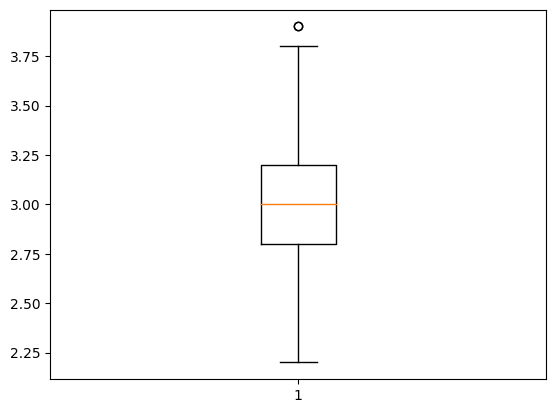

In [23]:
plt.figure()
plt.boxplot(data['SW'])
plt.show()

## ENCODING - LABEL ENCODING

In [24]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

data['Classification'] = le.fit_transform(data['Classification'])


In [25]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


## CLASSIFICATION MODELS

LOGISTIC REGRESSION

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
y = data['Classification']

In [29]:
X = data.drop(['Classification'],axis = 1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state =42)

In [57]:
lr =LogisticRegression(max_iter = 250)
model = lr.fit(X_train,y_train)
y_prediction_lg = model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, precision_score

In [58]:
print('Accuracy in Logistic Regression =',accuracy_score(y_test,y_prediction_lg))

Accuracy in Logistic Regression = 0.896551724137931


## Knn

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [36]:
metric_k = []
neighbors = np.arange(3,20)

In [37]:
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  model = classifier.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc= accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [38]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413,
 0.896551724137931]

In [63]:
classifier =KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model = classifier.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)
acc= accuracy_score(y_test,y_pred_knn)

In [64]:
print('Accuracy in KNN model',accuracy_score(y_test,y_pred_knn))

Accuracy in KNN model 0.9310344827586207


# SVM

In [43]:
from sklearn.svm import SVC


In [68]:
svm_cls = SVC(kernel = 'rbf')

In [69]:
svm_model     =svm_cls.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)

In [70]:
print('Accuracy in SVM model: ',accuracy_score(y_test,y_pred_svm))

Accuracy in SVM model:  0.8620689655172413


## DECISION TREE

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt_cls = DecisionTreeClassifier()
dt_model = dt_cls.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

In [52]:
print('Accuracy in Decision Tree model :', accuracy_score(y_test,y_pred_dt))

Accuracy in Decision Tree model : 0.896551724137931


## RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_cls = RandomForestClassifier(n_estimators=12,random_state=42)
model = rf_cls.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)

In [56]:
print('Accuracy in Random Forest:',accuracy_score(y_test,y_pred_rf))

Accuracy in Random Forest: 0.896551724137931


**COMPARISON OF DIFFERENT CLASSIFICATION MODEL**

In [62]:
print('Accuracy in Logistic Regression =',accuracy_score(y_test,y_prediction_lg))
print('Accuracy in KNN model',accuracy_score(y_test,y_pred_knn))
print('Accuracy in SVM model: ',accuracy_score(y_test,y_pred_svm))
print('Accuracy in Decision Tree model :', accuracy_score(y_test,y_pred_dt))
print('Accuracy in Random Forest:',accuracy_score(y_test,y_pred_rf))

Accuracy in Logistic Regression = 0.896551724137931
Accuracy in KNN model 0.9310344827586207
Accuracy in SVM model:  0.8620689655172413
Accuracy in Decision Tree model : 0.896551724137931
Accuracy in Random Forest: 0.896551724137931
